年份发表文章条形图+关于血吸虫病领域散点图

In [6]:
import pandas as pd

# raw URL
articles_url = 'https://raw.githubusercontent.com/shn522-BYJ/Group6_infec/main/data/articles.schistosomiasis.csv'
authors_url = 'https://raw.githubusercontent.com/shn522-BYJ/Group6_infec/main/data/authors.schistosomiasis.csv'
paper_counts_url = 'https://raw.githubusercontent.com/shn522-BYJ/Group6_infec/main/data/paper_counts.csv'
relevant_articles_url = 'https://raw.githubusercontent.com/shn522-BYJ/Group6_infec/bef30c8092be6ffeb2169881f087c46b86d6a7b3/data/relevant_articles_final.csv'

# load the file
articles_df = pd.read_csv(articles_url)
authors_df = pd.read_csv(authors_url)
paper_counts_df = pd.read_csv(paper_counts_url)
relevant_articles_df = pd.read_csv(relevant_articles_url)

In [ ]:
# check the data
print(articles_df.head())
print(authors_df.head())
print(paper_counts_df.head())
print(relevant_articles_df.head())


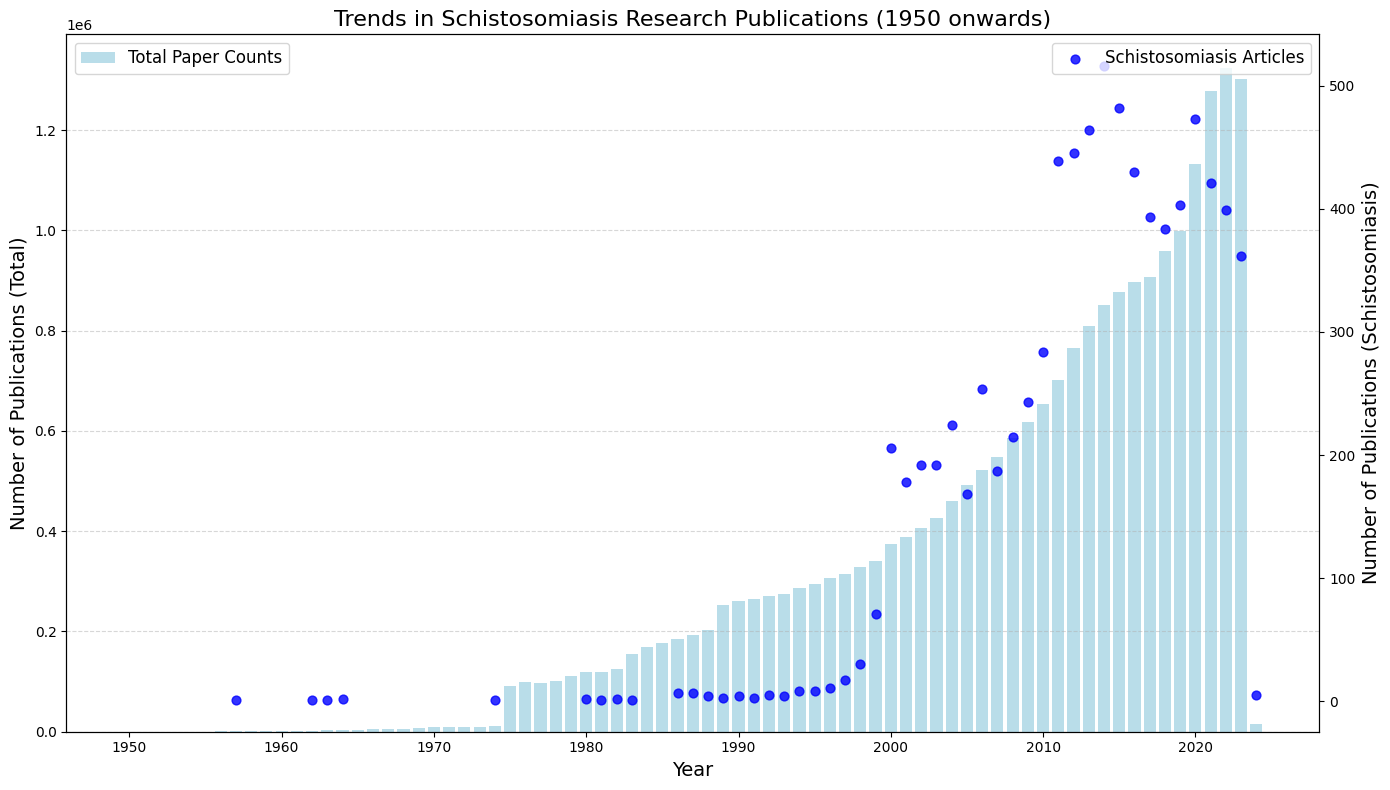

In [48]:
# Group relevant_articles_df by 'Year' to count publications per year
relevant_articles_counts = relevant_articles_df.groupby('Year').size().reset_index(name='Count')

# Filter data from 1950 onwards
paper_counts_filtered = paper_counts_df[paper_counts_df['Year'] >= 1950]
relevant_articles_filtered = relevant_articles_counts[relevant_articles_counts['Year'] >= 1950]

# Create the plot for data from 1950 onwards
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart for total paper counts
ax1.bar(paper_counts_filtered['Year'], paper_counts_filtered['Count'], color='lightblue', alpha=0.85, label='Total Paper Counts', width=0.8)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Publications (Total)', fontsize=14)
ax1.set_title('Trends in Schistosomiasis Research Publications (1950 onwards)', fontsize=16)
ax1.tick_params(axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.legend(loc='upper left', fontsize=12)

# Scatter plot for schistosomiasis-related articles
ax2 = ax1.twinx()
ax2.scatter(relevant_articles_filtered['Year'], relevant_articles_filtered['Count'], color='blue', label='Schistosomiasis Articles', s=40, alpha=0.8)
ax2.set_ylabel('Number of Publications (Schistosomiasis)', fontsize=14)
ax2.tick_params(axis='y')
ax2.legend(loc='upper right', fontsize=12)

# Adjusting layout for better readability
plt.tight_layout()

plt.show()

1.谁最活跃

In [ ]:
# Analysis of research activities
author_activity = authors_df.groupby('AuthorLastname').size().reset_index(name='PublicationCount')
top_active_authors = author_activity.sort_values(by='PublicationCount', ascending=False).head(20)

# 显示前20名活跃研究者
print("Top 20 Active Researchers in Schistosomiasis:")
print(top_active_authors)

Top 20 Active Researchers in Schistosomiasis:
      AuthorLastname  PublicationCount
7952              Li              1327
14415           Wang              1228
15273          Zhang              1194
8071             Liu               788
2773            Chen               707
15340           Zhou               702
14817             Xu               614
14909           Yang               587
14676             Wu               477
15341            Zhu               406
6293           Huang               320
6706           Jiang               319
15276           Zhao               285
6274              Hu               283
2465             Cao               259
5093             Gao               254
15099             Yu               250
8192              Lu               247
5978              He               246
8034             Lin               244


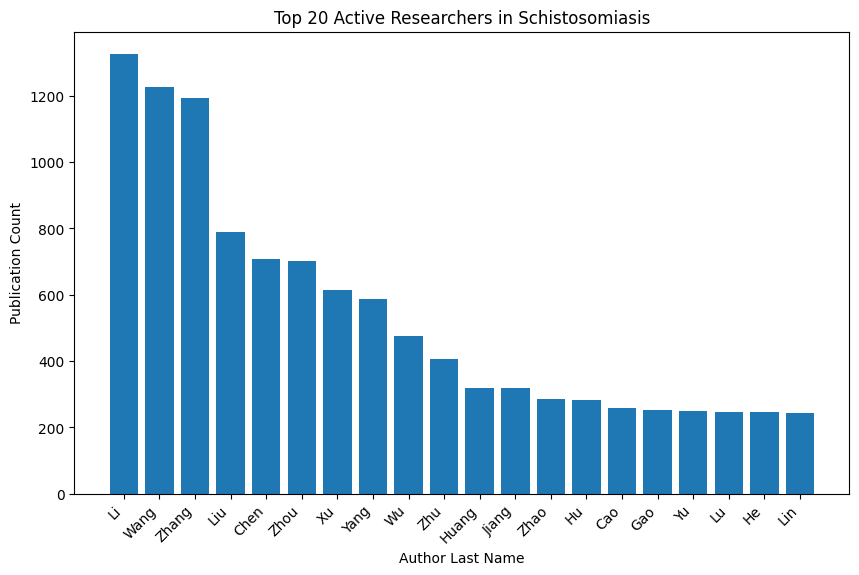

In [ ]:
 #可视化
 import matplotlib.pyplot as plt

 # 绘制活跃研究人员的柱状图
plt.figure(figsize=(10, 6))
plt.bar(top_active_authors['AuthorLastname'], top_active_authors['PublicationCount'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Active Researchers in Schistosomiasis')
plt.xlabel('Author Last Name')
plt.ylabel('Publication Count')
plt.show()

2.这些最活跃的与谁合作频率多

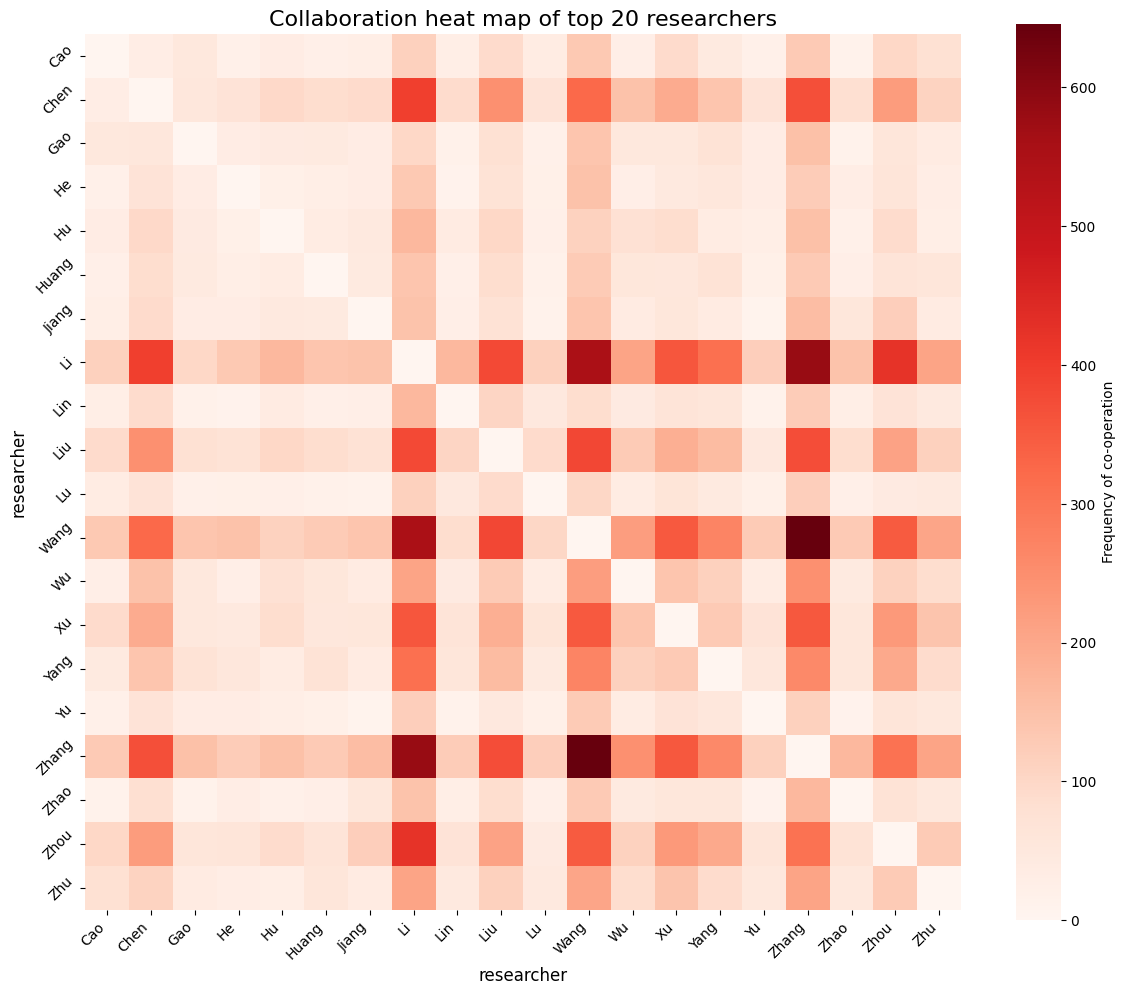

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 获取前20名活跃研究人员
author_activity = authors_df.groupby('AuthorLastname').size().reset_index(name='PublicationCount')
top_active_authors = author_activity.sort_values(by='PublicationCount', ascending=False).head(20)
top_authors = top_active_authors['AuthorLastname'].tolist()

# 筛选与前20名作者相关的合作数据
top_authors_data = authors_df[authors_df['AuthorLastname'].isin(top_authors)]

# 构建合作频率统计
cooperation = (
    top_authors_data.merge(top_authors_data, on='PMID')
    .query('AuthorLastname_x != AuthorLastname_y')
    .groupby(['AuthorLastname_x', 'AuthorLastname_y'])
    .size()
    .reset_index(name='CollaborationCount')
)

# 构建合作矩阵
cooperation_matrix = cooperation.pivot(
    index='AuthorLastname_x', columns='AuthorLastname_y', values='CollaborationCount'
).fillna(0)

# 绘制热力图
plt.figure(figsize=(12, 10))
sns.heatmap(
    cooperation_matrix,
    annot=False,
    cmap="Reds",
    square=True,
    cbar_kws={'label': 'Frequency of co-operation'}
)
plt.title("Collaboration heat map of top 20 researchers", fontsize=16)
plt.xlabel("researcher", fontsize=12)
plt.ylabel("researcher", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

3. 低产但高质量研究者

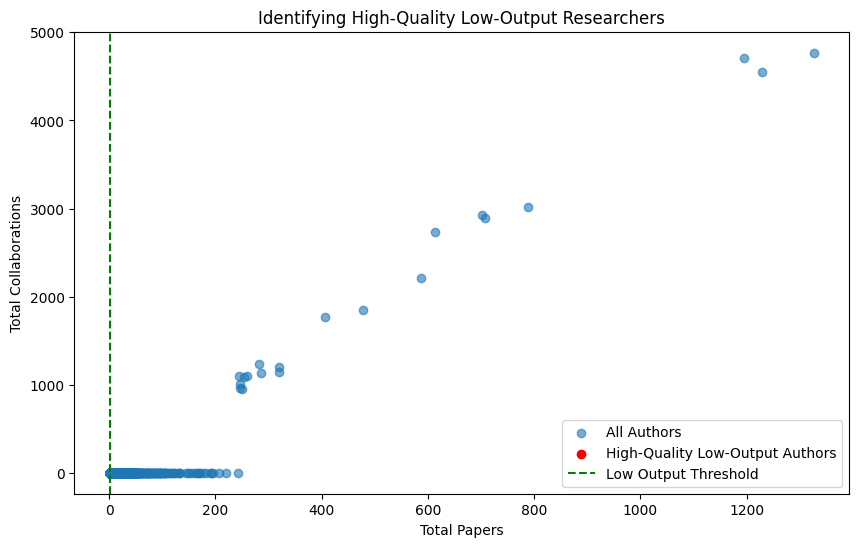

In [ ]:
# 统计每位作者的论文总数和总合作频率
author_stats = authors_df.groupby('AuthorLastname').size().reset_index(name='TotalPapers')
author_stats['TotalCollaborations'] = cooperation_matrix.sum(axis=1).reindex(author_stats['AuthorLastname']).fillna(0).values

# 定义低产研究者（如论文总数处于10%分位数以下）
low_output_threshold = author_stats['TotalPapers'].quantile(0.1)
low_output_authors = author_stats[author_stats['TotalPapers'] <= low_output_threshold]

# 识别高质量研究者（例如合作频率较高的低产作者）
high_quality_authors = low_output_authors[low_output_authors['TotalCollaborations'] > low_output_authors['TotalCollaborations'].mean()]

# 可视化结果
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    author_stats['TotalPapers'],
    author_stats['TotalCollaborations'],
    alpha=0.6, label='All Authors'
)
plt.scatter(
    high_quality_authors['TotalPapers'],
    high_quality_authors['TotalCollaborations'],
    color='red', label='High-Quality Low-Output Authors'
)
plt.axvline(low_output_threshold, color='green', linestyle='--', label='Low Output Threshold')
plt.xlabel('Total Papers')
plt.ylabel('Total Collaborations')
plt.title('Identifying High-Quality Low-Output Researchers')
plt.legend()
plt.show()